In this notebook, we focus on one of the unsupervised machine learning algorithm for clustering called KMeans.

Many clustering algorithms are available in Scikit-Learn, but perhaps the simplest to understand approach is an algorithm known as k-means clustering, which is implemented in `sklearn.cluster.KMeans` ([docs](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans)).

For this exercise, in the first section, we create a synthetic dataset and use Kmeans for clustering the data to different groups.

In the second part, we use KMeans for clustering on a real dataset of mall customers.

# K-Means Clustering for Synthetic Data with Defined K

In [1]:
# improt standard libs
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

To start, let's generate a two-dimensional dataset containing four distinct blobs. To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


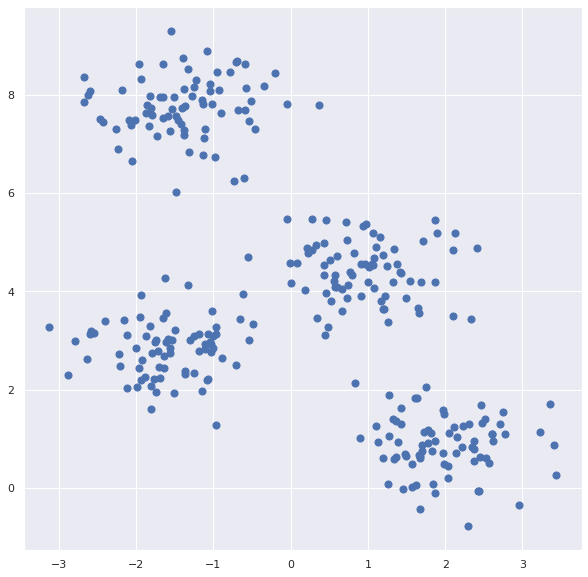

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], s=50);

At a glance, it is relatively easy to pick out the four clusters. The k-means algorithm does this automatically, and in Scikit-Learn uses the typical estimator API:

# Build KMeans Model

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Let's visualize the results by plotting the data colored by these labels. We will also plot the cluster centers as determined by the k-means estimator.

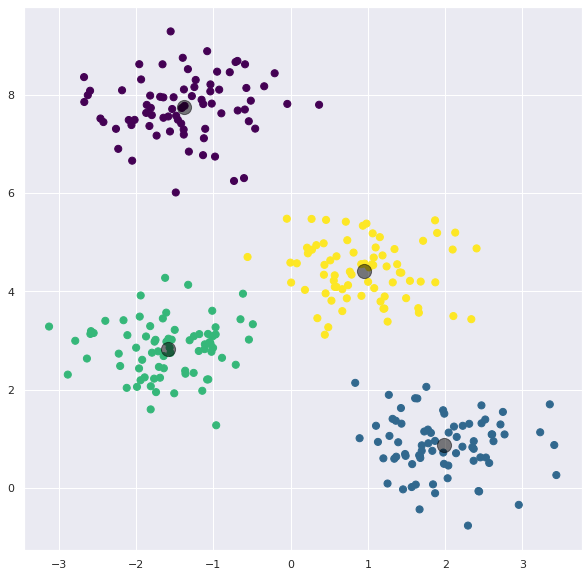

In [4]:
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


The good news is that the k-means algorithm (at least in this simple case) assigns the points to clusters very similarly to how we might assign them by eye. You might wonder how this algorithm finds these clusters so quickly! After all, the number of possible combinations of cluster assignments is exponential with respect to the number of data points and therefore an exhaustive search would be extremely time intensive. Fortunately for us, such an exhaustive search is not necessary; instead, the typical approach to k-means involves an intuitive iterative approach known as expectation–maximization. This iterative approach allows the algorithm to skip checking every solution and instead take advantage of randomness to make a close "guess" to an optimal solution. Despite lacking a guarantee of optimality, in practice "near optimal" is often close enough to provide utility.

For more information and practice exercises check out the following link:
https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

# K-Means Clustering for Mall Customer Data with Finding Optimum K

Dataset we are using here is the Mall Customers data (Download here). It’s unlabeled data that contains the details of customers in a mall ( features like genre, age, annual income(k$), and spending score ). Our aim is to cluster the customers based on the relevant features annual income and spending score. 

# Loading the Data

In [5]:
# import libs
import pandas as pd

In [6]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


lets just focus on these two important feature by slicing them from the dataset.

In [8]:
X = dataset.iloc[:, [3, 4]].values

A cluster center is the representative of its cluster. The squared distance between each point and its cluster center is the required variation. The aim of k-means clustering is to find these k clusters and their centers while reducing the total error. Quite an elegant algorithm. But How do you decide the number of clusters?



# Data Division

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size = 0.1, random_state = 0)
print('train and test data', X_train.shape, X_test.shape)

train and test data (180, 2) (20, 2)


# Elbow Method for Finding Optimum K


Finding the optimal number of clusters is an important part of this algorithm. A commonly used method for finding optimal K value is Elbow Method.  

In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – k-max. For each value of K, we are calculating WCSS (Within-Cluster Sum of Square). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. 

When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.

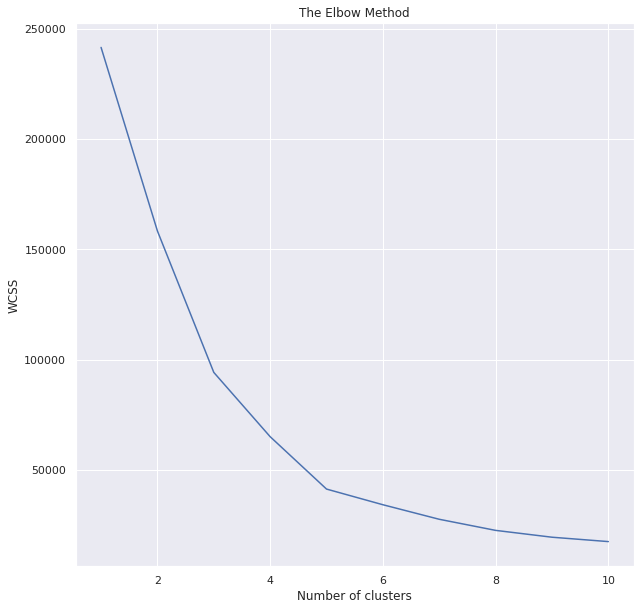

In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 10))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The point at which the elbow shape is created is 5, that is, our K value or an optimal number of clusters is 5. Now let’s train the model on the dataset with a number of clusters 5.

# Build KMeans Model with Optimum K
Lets build a Kmeans model using our train data and also selected optimum k. After that we do prediction on our test data.

In [11]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans_trained = kmeans.fit(X_train)
y_kmeans_test = kmeans_trained.predict(X_test)
y_kmeans_train = kmeans_trained.predict(X_train)

lets visualize the detected clusters for our test data based on our two important features. We wrote our customized funciton for cluster visualization as below.

detected cluster for out test data:



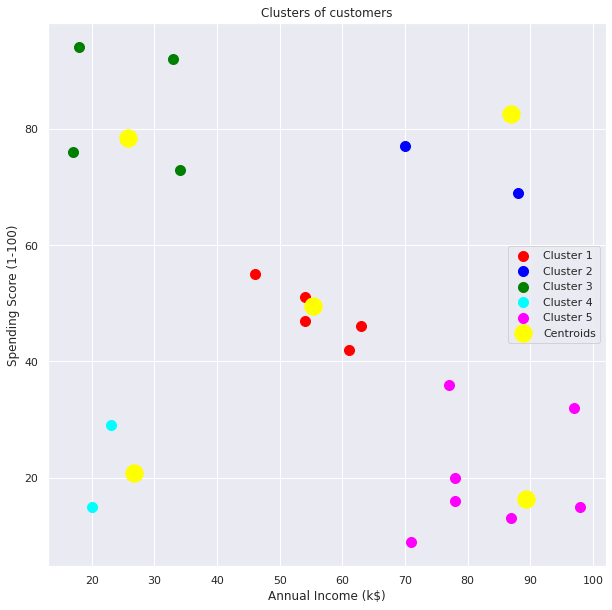

detected cluster for out train data:



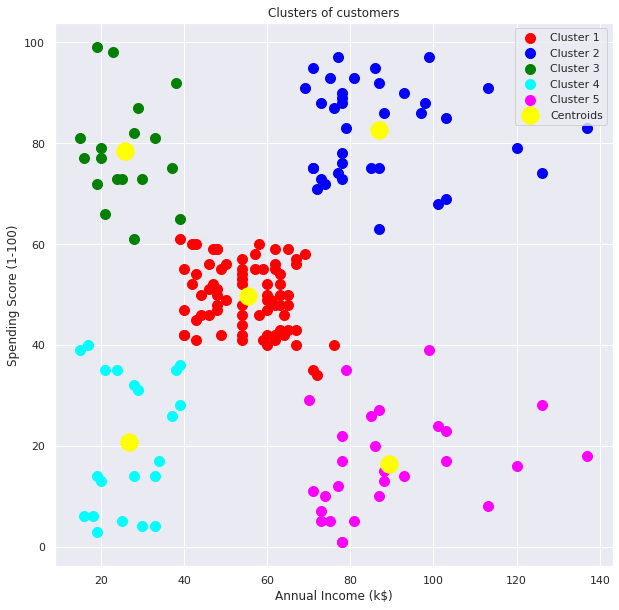

In [12]:
def plot_clusters(X, y_kmeans):
  plt.figure(figsize=(10, 10))
  plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],
              s=100, c='red', label='Cluster 1')
  plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],
              s=100, c='blue', label='Cluster 2')
  plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
              s=100, c='green', label='Cluster 3')
  plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1],
              s=100, c='cyan', label='Cluster 4')
  plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1],
              s=100, c='magenta', label='Cluster 5')
  plt.scatter(
      kmeans.cluster_centers_[
          :, 0], kmeans.cluster_centers_[
              :, 1], s=300, c='yellow', label='Centroids')
  plt.title('Clusters of customers')
  plt.xlabel('Annual Income (k$)')
  plt.ylabel('Spending Score (1-100)')
  plt.legend()
  plt.show()
print('detected cluster for out test data:\n')
plot_clusters(X_test, y_kmeans_test)

print('detected cluster for out train data:\n')
plot_clusters(X_train, y_kmeans_train)